In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## K-Means Algorithm

In [9]:
X = np.random.random_sample((100,2))
print(f"we have an array of {X.shape[0]} points and each has {X.shape[1]} features\n",X)

we have an array of 100 points and each has 2 features
 [[0.23023139 0.93524646]
 [0.68812232 0.74057841]
 [0.40107137 0.09562312]
 [0.75686025 0.04026702]
 [0.23163685 0.36749346]
 [0.85132538 0.57471588]
 [0.45096206 0.18864137]
 [0.17693794 0.46022456]
 [0.53673228 0.99930958]
 [0.11408715 0.48367314]
 [0.24843735 0.13770417]
 [0.30397311 0.72805472]
 [0.5255143  0.19089254]
 [0.7373546  0.60689321]
 [0.11928645 0.70185857]
 [0.35069934 0.24345534]
 [0.67709494 0.51414289]
 [0.92158767 0.27265891]
 [0.06692174 0.59159475]
 [0.03677586 0.90070483]
 [0.84399863 0.35609928]
 [0.46776439 0.41726599]
 [0.42144768 0.33623886]
 [0.90628534 0.62475673]
 [0.61825483 0.3106892 ]
 [0.9185191  0.36635015]
 [0.35297895 0.15234475]
 [0.87366058 0.1313628 ]
 [0.06212643 0.77457691]
 [0.51169906 0.52349049]
 [0.7470324  0.08952089]
 [0.89022124 0.98691611]
 [0.41943968 0.65723976]
 [0.97615347 0.0222889 ]
 [0.78624633 0.99453012]
 [0.76432446 0.83795975]
 [0.65006144 0.34539716]
 [0.78199322 0.8473

<Axes: >

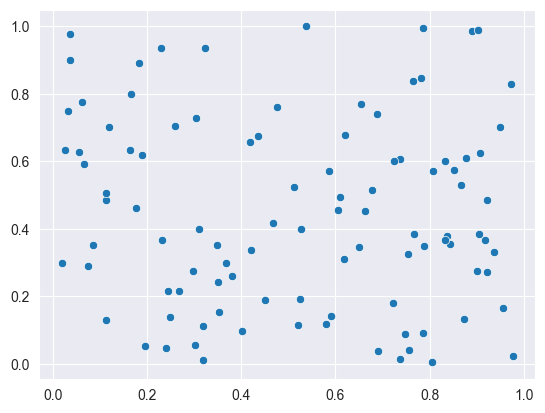

In [10]:
sns.scatterplot(x=X[:,0], y=X[:,1])

### n pseudocode, the K-means algorithm is as follows:

  Initialize centroids
  K is the number of clusters
  centroids = kMeans_init_centroids(X, K)

  for iter in range(iterations):
  #### Cluster assignment step: 
      # Assign each data point to the closest centroid. 
      # idx[i] corresponds to the index of the centroid 
      # assigned to example i
      idx = find_closest_centroids(X, centroids)
      Move centroid step: 
      Compute means based on centroid assignments
      centroids = compute_centroids(X, idx, K)

In [11]:
#centroids = np.random.random_sample((4,2))
centroids = np.random.permutation(X)[:4]
print(centroids)

[[0.78199322 0.8473972 ]
 [0.7373546  0.60689321]
 [0.24381262 0.21512055]
 [0.41943968 0.65723976]]


#### this code will get the closest centroid 

In [12]:
def find_closest_centroids(X,centroids):  
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distances = (centroids - X[i])**2
        distances = np.sqrt(distances.sum(axis=1,keepdims = True))
        idx[i] = np.argmin(distances)
        #print(f"training example num {i} ")
        #print(distances)
        print(f"for training example {i} closest centroid is at:",idx[i])
    return idx

idx = find_closest_centroids(X,centroids)

for training example 0 closest centroid is at: 3
for training example 1 closest centroid is at: 0
for training example 2 closest centroid is at: 2
for training example 3 closest centroid is at: 2
for training example 4 closest centroid is at: 2
for training example 5 closest centroid is at: 1
for training example 6 closest centroid is at: 2
for training example 7 closest centroid is at: 2
for training example 8 closest centroid is at: 0
for training example 9 closest centroid is at: 2
for training example 10 closest centroid is at: 2
for training example 11 closest centroid is at: 3
for training example 12 closest centroid is at: 2
for training example 13 closest centroid is at: 1
for training example 14 closest centroid is at: 3
for training example 15 closest centroid is at: 2
for training example 16 closest centroid is at: 1
for training example 17 closest centroid is at: 1
for training example 18 closest centroid is at: 3
for training example 19 closest centroid is at: 3
for traini

#### now let's write the function that computes the centroids

In [13]:
# UNQ_C2
# GRADED FUNCTION: compute_centroids

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    #Ck = np.zeros(K)
    
    ### START CODE HERE ###
    # for i in range(m):
    #     centroids[idx[i]] = centroids[idx[i]] + X[i]
    #     Ck[idx[i]] = Ck[idx[i]] + 1
    # for i in range(K):
    #     centroids[i] /= Ck[i]
    for k in range(K):   
        points = X[idx==k] ##find the index of idx where value is k and evaluate it to X
        centroids[k] = np.mean(points, axis=0)
    
    
    ### END CODE HERE ## 
    print(centroids)
    return centroids

compute_centroids(X,idx,centroids.shape[0])

[[0.79262651 0.8696571 ]
 [0.79482582 0.39669033]
 [0.35149605 0.2057756 ]
 [0.23165831 0.71084017]]


array([[0.79262651, 0.8696571 ],
       [0.79482582, 0.39669033],
       [0.35149605, 0.2057756 ],
       [0.23165831, 0.71084017]])

In [14]:
for iter in range(20):
    idx = find_closest_centroids(X, centroids)
    centroids = compute_centroids(X, idx, K = centroids.shape[0])

print(centroids)


for training example 0 closest centroid is at: 3
for training example 1 closest centroid is at: 0
for training example 2 closest centroid is at: 2
for training example 3 closest centroid is at: 2
for training example 4 closest centroid is at: 2
for training example 5 closest centroid is at: 1
for training example 6 closest centroid is at: 2
for training example 7 closest centroid is at: 2
for training example 8 closest centroid is at: 0
for training example 9 closest centroid is at: 2
for training example 10 closest centroid is at: 2
for training example 11 closest centroid is at: 3
for training example 12 closest centroid is at: 2
for training example 13 closest centroid is at: 1
for training example 14 closest centroid is at: 3
for training example 15 closest centroid is at: 2
for training example 16 closest centroid is at: 1
for training example 17 closest centroid is at: 1
for training example 18 closest centroid is at: 3
for training example 19 closest centroid is at: 3
for traini

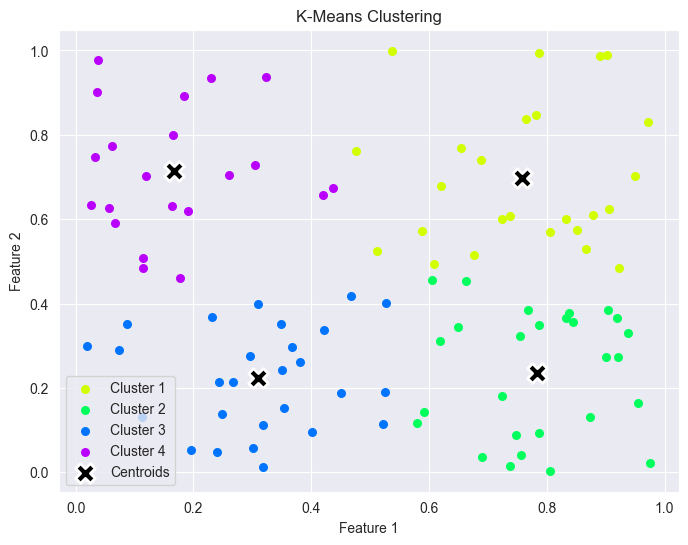

In [15]:
palette = sns.color_palette("hsv", centroids.shape[0])

# Create a new plot
plt.figure(figsize=(8, 6))

# Plot each cluster with a different color
for k in range(centroids.shape[0]):
    cluster_points = X[idx == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                s=30, color=palette[k], label=f'Cluster {k+1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], 
            s=200, c='black', marker='X', edgecolors='white', linewidths=2, label='Centroids')

plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Anomaly Detection
#### we need first to calculate the mean and the variance for a training set using estimate_gaussian function
You can estimate the parameters, ($\mu_i$, $\sigma_i^2$), of the $i$-th
feature by using the following equations. To estimate the mean, you will
use:

$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

and for the variance you will use:
$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$

In [19]:
def estimate_gaussian(X):
    mu = np.mean(X, axis=0)
    var = np.var(X, axis=0,mean=mu)
    return mu,var

X_example  =np.array([[1,2],[1,2],[1,2],[1,4]])
mu,var =  estimate_gaussian(X_example)
print(mu,var)

[1.  2.5] [0.   0.75]


#### we calculate the probabilities of each X_examples
$$p(\vec{x}) = \prod_{j=1}^{n} \frac{1}{\sqrt{2\pi}\sigma_j}e^{-\frac{(x_j-\mu_j)^2}{2\sigma_j^2}}$$

In [42]:
def non_vectorized_multivariate_gaussian(X,mu,var):
    
    sqrt_of_2pi_std = np.sqrt(2*np.pi*var)
    z_scores = ((mu - X) ** 2)/(2*var)
    probs = np.ones(X.shape[0])
    
    for x in range(X.shape[0]):
        for f in range(X.shape[1]):
            probs[x] = probs[x] * (1/sqrt_of_2pi_std[f]) * np.exp(-z_scores[x][f])
            
    return probs

def vec_multivariate_gaussian(X,mu,var):

    #we calc a single number which is the product of norm for every feature, which is same for all training examples    
    normalisation = 1 / np.prod(np.sqrt(var * 2 * np.pi)) 
    
    #we calc the z_score for all training examples
    exponents = -((X - mu) ** 2)/(2 * var)
    
    #we calc the sum of exponents according to Exponentiation features
    
    probs = normalisation * np.exp(np.sum(exponents,axis=1))
    return probs

print(vec_multivariate_gaussian(X_example,mu,var+0.0000001),'\n',
      non_vectorized_multivariate_gaussian(X_example,mu,var+0.0000001))

[491.9342573  491.9342573  491.9342573  129.67248542] 
 [491.9342573  491.9342573  491.9342573  129.67248542]


#### now we estimate epsilon of anomaly detection with f1-score

In [ ]:
# UNQ_C2
# GRADED FUNCTION: select_threshold

def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 

    best_epsilon = 0
    best_F1 = 0
        
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
    
        ### START CODE HERE ### 
        
        pred = p_val < epsilon
        tp = np.sum((pred == 1)& (y_val == 1))
        fp = np.sum((pred == 1)& (y_val == 0))
        fn = np.sum((pred == 0)& (y_val == 1))
        #print(tp,fp,fn)
        
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2 * prec * rec)/(prec + rec)
        
        ### END CODE HERE ### 
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1
